<a href="https://colab.research.google.com/github/dmulyana5/20416255201010/blob/main/latihan_uts_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import some python modules
import scipy , itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from google.colab import drive
drive.mount ('/content/drive')

plt.style.use ('bmh'); sns.set()

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import data
price = pd.read_csv('/content/drive/MyDrive/01. Materi Kuliah UBP Karawang/Absenteeism_at_work.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ukuran Data
N, P = price.shape
print('baris = ', N, ', Kolom = ', P)

baris =  740 , Kolom =  21


In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average_day            740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [ ]:
# "Mengintip" beberapa data pertamanya
price.head(10)

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   
5   3                  23                 7                6        1   
6  10                  22                 7                6        1   
7  20                  23                 7                6        1   
8  14                  19                 7                2        1   
9   1                  22                 7                2        1   

   Transportation_expense  Distance_from_Residence_to_Work  Service_time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   
5                     179                               51            18   38   
6                     361                               52             3   28   
7                     260                               50            11   36   
8                     155                               12            14   34   
9                     235                               11            14   37   

   Work_load_Average_day   ...  Disciplinary_failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   
5                 239.554  ...                     0          1    0   
6                 239.554  ...                     0          1    1   
7                 239.554  ...                     0          1    4   
8                 239.554  ...                     0          1    2   
9                 239.554  ...                     0          3    1   

   Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   
5               1              0    0      89     170               31   
6               1              0    4      80     172               27   
7               1              0    0      65     168               23   
8               1              0    0      95     196               25   
9               0              0    1      88     172               29   

   Absenteeism_time_in_hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  
5                          2  
6                          8  
7                          4  
8                         40  
9                          8  

[10 rows x 21 columns]

In [ ]:
# "Mengintip" beberapa data akhirnya
price.tail(7)

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
733  28                  22                 7                4        1   
734  13                  13                 7                2        1   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation_expense  Distance_from_Residence_to_Work  Service_time  \
733                     225                               26             9   
734                     369                               17            12   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work_load_Average_day   ...  Disciplinary_failure  Education  Son  \
733   28                 264.604  ...                     0          1    1   
734   31                 264.604  ...                     0          1    3   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
733               0              0    2      69     169               24   
734               1              0    0      70     169               25   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism_time_in_hours  
733                          8  
734                         80  
735                          8  
736                          4  
737                          0  
738                          0  
739                          0  

[7 rows x 21 columns]

In [ ]:
# chosen at random
price.sample(8)

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
724  12                  22                 6                4        1   
514  15                  23                10                6        4   
47   15                  23                 9                5        1   
440  22                  23                 5                4        3   
43    5                  19                 9                3        1   
206  14                  28                 5                2        3   
344  20                  28                12                6        4   
81   28                  23                11                4        4   

     Transportation_expense  Distance_from_Residence_to_Work  Service_time  \
724                     233                               51             1   
514                     291                               31            12   
47                      291                               31            12   
440                     179                               26             9   
43                      235                               20            13   
206                     155                               12            14   
344                     260                               50            11   
81                      225                               26             9   

     Age  Work_load_Average_day   ...  Disciplinary_failure  Education  Son  \
724   31                 275.089  ...                     0          2    1   
514   40                 284.853  ...                     0          1    1   
47    40                 241.476  ...                     0          1    1   
440   30                 246.074  ...                     0          3    0   
43    43                 241.476  ...                     0          1    1   
206   34                 378.884  ...                     0          1    2   
344   36                 236.629  ...                     0          1    4   
81    28                 306.345  ...                     0          1    1   

     Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
724               1              0    8      68     178               21   
514               1              0    1      73     171               25   
47                1              0    1      73     171               25   
440               0              0    0      56     171               19   
43                1              0    0     106     167               38   
206               1              0    0      95     196               25   
344               1              0    0      65     168               23   
81                0              0    2      69     169               24   

     Absenteeism_time_in_hours  
724                          3  
514                          1  
47                           4  
440                          3  
43                           8  
206                          1  
344                          4  
81                           1  

[8 rows x 21 columns]

In [ ]:
price.head(10)

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   
5   3                  23                 7                6        1   
6  10                  22                 7                6        1   
7  20                  23                 7                6        1   
8  14                  19                 7                2        1   
9   1                  22                 7                2        1   

   Transportation_expense  Distance_from_Residence_to_Work  Service_time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   
5                     179                               51            18   38   
6                     361                               52             3   28   
7                     260                               50            11   36   
8                     155                               12            14   34   
9                     235                               11            14   37   

   Work_load_Average_day   ...  Disciplinary_failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   
5                 239.554  ...                     0          1    0   
6                 239.554  ...                     0          1    1   
7                 239.554  ...                     0          1    4   
8                 239.554  ...                     0          1    2   
9                 239.554  ...                     0          3    1   

   Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   
5               1              0    0      89     170               31   
6               1              0    4      80     172               27   
7               1              0    0      65     168               23   
8               1              0    0      95     196               25   
9               0              0    1      88     172               29   

   Absenteeism_time_in_hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  
5                          2  
6                          8  
7                          4  
8                         40  
9                          8  

[10 rows x 21 columns]

In [ ]:
price.describe()

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation_expense  Distance_from_Residence_to_Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service_time         Age  Work_load_Average_day   ...  \
count    740.000000  740.000000              740.000000  ...   
mean      12.554054   36.450000              271.490235  ...   
std        4.384873    6.478772               39.058116  ...   
min        1.000000   27.000000              205.917000  ...   
25%        9.000000   31.000000              244.387000  ...   
50%       13.000000   37.000000              264.249000  ...   
75%       16.000000   40.000000              294.217000  ...   
max       29.000000   58.000000              378.884000  ...   

       Disciplinary_failure   Education         Son  Social_drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social_smoker         Pet      Weight      Height  Body_mass_index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism_time_in_hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [ ]:
# Drop kolom pertama karena tidak berguna (hanya index)
price.drop("Day_of_the_week", axis=1, inplace=True)
price.dtypes

ID                                   int64
Reason_for_absence                   int64
Month_of_absence                     int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average_day              float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                            int64
Son                                  int64
Social_drinker                       int64
Social_smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body_mass_index                      int64
Absenteeism_time_in_hours            int64
dtype: object

In [ ]:
# Merubah tipe data "jika" tidak tepat, contoh:
price.dtypes

ID                                   int64
Reason_for_absence                   int64
Month_of_absence                     int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average_day              float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                            int64
Son                                  int64
Social_drinker                       int64
Social_smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body_mass_index                      int64
Absenteeism_time_in_hours            int64
dtype: object

In [ ]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
price['Seasons'] = price['Seasons'].astype('int64')
price['Transportation_expense'] = price['Transportation_expense'].astype('int64')
price.dtypes

ID                                   int64
Reason_for_absence                   int64
Month_of_absence                     int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average_day              float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                            int64
Son                                  int64
Social_drinker                       int64
Social_smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body_mass_index                      int64
Absenteeism_time_in_hours            int64
dtype: object

# **Statistika Deskriptif**

In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
price.describe(include='all')

ID  Reason_for_absence  Month_of_absence     Seasons  \
count  740.000000          740.000000        740.000000  740.000000   
mean    18.017568           19.216216          6.324324    2.544595   
std     11.021247            8.433406          3.436287    1.111831   
min      1.000000            0.000000          0.000000    1.000000   
25%      9.000000           13.000000          3.000000    2.000000   
50%     18.000000           23.000000          6.000000    3.000000   
75%     28.000000           26.000000          9.000000    4.000000   
max     36.000000           28.000000         12.000000    4.000000   

       Transportation_expense  Distance_from_Residence_to_Work  Service_time  \
count              740.000000                       740.000000    740.000000   
mean               221.329730                        29.631081     12.554054   
std                 66.952223                        14.836788      4.384873   
min                118.000000                         5.000000      1.000000   
25%                179.000000                        16.000000      9.000000   
50%                225.000000                        26.000000     13.000000   
75%                260.000000                        50.000000     16.000000   
max                388.000000                        52.000000     29.000000   

              Age  Work_load_Average_day   Hit_target  Disciplinary_failure  \
count  740.000000              740.000000  740.000000            740.000000   
mean    36.450000              271.490235   94.587838              0.054054   
std      6.478772               39.058116    3.779313              0.226277   
min     27.000000              205.917000   81.000000              0.000000   
25%     31.000000              244.387000   93.000000              0.000000   
50%     37.000000              264.249000   95.000000              0.000000   
75%     40.000000              294.217000   97.000000              0.000000   
max     58.000000              378.884000  100.000000              1.000000   

        Education         Son  Social_drinker  Social_smoker         Pet  \
count  740.000000  740.000000      740.000000     740.000000  740.000000   
mean     1.291892    1.018919        0.567568       0.072973    0.745946   
std      0.673238    1.098489        0.495749       0.260268    1.318258   
min      1.000000    0.000000        0.000000       0.000000    0.000000   
25%      1.000000    0.000000        0.000000       0.000000    0.000000   
50%      1.000000    1.000000        1.000000       0.000000    0.000000   
75%      1.000000    2.000000        1.000000       0.000000    1.000000   
max      4.000000    4.000000        1.000000       1.000000    8.000000   

           Weight      Height  Body_mass_index  Absenteeism_time_in_hours  
count  740.000000  740.000000       740.000000                 740.000000  
mean    79.035135  172.114865        26.677027                   6.924324  
std     12.883211    6.034995         4.285452                  13.330998  
min     56.000000  163.000000        19.000000                   0.000000  
25%     69.000000  169.000000        24.000000                   2.000000  
50%     83.000000  170.000000        25.000000                   3.000000  
75%     89.000000  172.000000        31.000000                   8.000000  
max    108.000000  196.000000        38.000000                 120.000000

In [ ]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
price[['Month_of_absence','Age']].describe(include='all')

Month_of_absence         Age
count        740.000000  740.000000
mean           6.324324   36.450000
std            3.436287    6.478772
min            0.000000   27.000000
25%            3.000000   31.000000
50%            6.000000   37.000000
75%            9.000000   40.000000
max           12.000000   58.000000

# **variable selection**

In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_num = price.select_dtypes(include = ['float64', 'int64'])
price_num.head()

ID  Reason_for_absence  Month_of_absence  Seasons  Transportation_expense  \
0  11                  26                 7        1                     289   
1  36                   0                 7        1                     118   
2   3                  23                 7        1                     179   
3   7                   7                 7        1                     279   
4  11                  23                 7        1                     289   

   Distance_from_Residence_to_Work  Service_time  Age  Work_load_Average_day   \
0                               36            13   33                 239.554   
1                               13            18   50                 239.554   
2                               51            18   38                 239.554   
3                                5            14   39                 239.554   
4                               36            13   33                 239.554   

   Hit_target  Disciplinary_failure  Education  Son  Social_drinker  \
0          97                     0          1    2               1   
1          97                     1          1    1               1   
2          97                     0          1    0               1   
3          97                     0          1    2               1   
4          97                     0          1    2               1   

   Social_smoker  Pet  Weight  Height  Body_mass_index  \
0              0    1      90     172               30   
1              0    0      98     178               31   
2              0    0      89     170               31   
3              1    0      68     168               24   
4              0    1      90     172               30   

   Absenteeism_time_in_hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_cat = price.select_dtypes(include = ['float64'])
price_cat.head()

Work_load_Average_day 
0                 239.554
1                 239.554
2                 239.554
3                 239.554
4                 239.554

In [ ]:
df = pd.get_dummies(price['Seasons'], prefix='Park')
df.head()

Park_1  Park_2  Park_3  Park_4
0       1       0       0       0
1       1       0       0       0
2       1       0       0       0
3       1       0       0       0
4       1       0       0       0

# **menggabungakan dengan data awal**

In [ ]:
df2 = pd.concat([price, df], axis = 1)
df2.head(5)

ID  Reason_for_absence  Month_of_absence  Seasons  Transportation_expense  \
0  11                  26                 7        1                     289   
1  36                   0                 7        1                     118   
2   3                  23                 7        1                     179   
3   7                   7                 7        1                     279   
4  11                  23                 7        1                     289   

   Distance_from_Residence_to_Work  Service_time  Age  Work_load_Average_day   \
0                               36            13   33                 239.554   
1                               13            18   50                 239.554   
2                               51            18   38                 239.554   
3                                5            14   39                 239.554   
4                               36            13   33                 239.554   

   Hit_target  ...  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0          97  ...              0    1      90     172               30   
1          97  ...              0    0      98     178               31   
2          97  ...              0    0      89     170               31   
3          97  ...              1    0      68     168               24   
4          97  ...              0    1      90     172               30   

   Absenteeism_time_in_hours  Park_1  Park_2  Park_3  Park_4  
0                          4       1       0       0       0  
1                          0       1       0       0       0  
2                          2       1       0       0       0  
3                          4       1       0       0       0  
4                          2       1       0       0       0  

[5 rows x 24 columns]

In [ ]:
# Choosing some columns manually
X = price[['Month_of_absence','Age']] 
X[:10]

Month_of_absence  Age
0                 7   33
1                 7   50
2                 7   38
3                 7   39
4                 7   33
5                 7   38
6                 7   28
7                 7   36
8                 7   34
9                 7   37

Distribusi nilai pada setiap variabel kategorik

In [ ]:
# get all unique values of a variable/column
for col in price_cat.columns:
    print(col,': ', set(price[col].unique()))

Work_load_Average_day  :  {261.306, 261.756, 264.249, 265.615, 265.017, 264.604, 268.519, 271.219, 275.312, 275.089, 280.549, 284.031, 284.853, 294.217, 302.585, 306.345, 308.593, 313.532, 326.452, 330.061, 205.917, 343.253, 253.957, 222.196, 249.797, 230.29, 236.629, 237.656, 239.554, 239.409, 241.476, 244.387, 246.074, 246.288, 377.55, 378.884, 251.818, 253.465}


In [ ]:
price['Seasons'].unique()

array([1, 4, 2, 3])

In [ ]:
# price
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = price.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average_day ',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

In [ ]:
# Distribusi tiap data
price['Seasons'].value_counts()
# kita bisa juga visualisasikan informasi ini

4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64

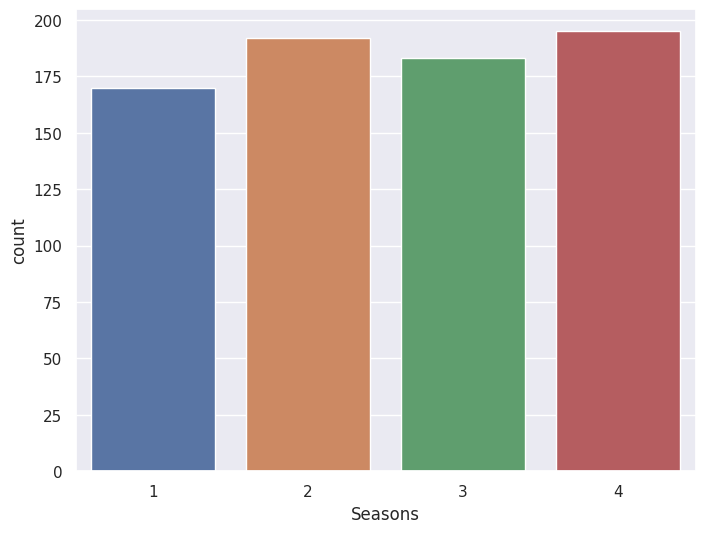

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Seasons", data=price)

In [ ]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

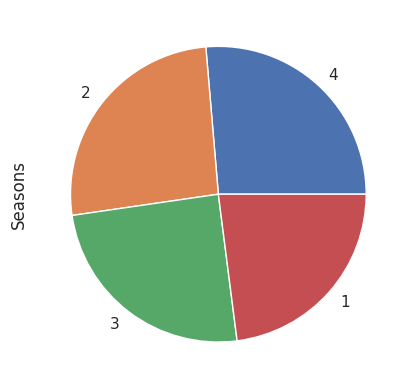

In [ ]:
# PieChart
plot = price.Seasons.value_counts().plot(kind='pie')

# **Apakah ada kecenderungan perbedaan jumlah absen akibat dari tipe season?**

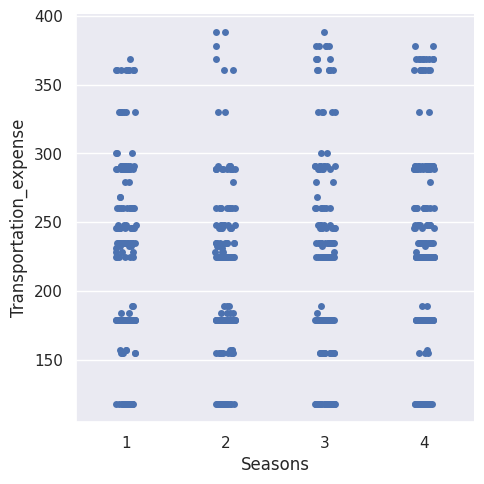

In [ ]:
p= sns.catplot(x="Seasons", y="Transportation_expense", data=price)
# Apa yang bisa dilihat dari hasil ini?

# **Univariate Outlier removal**

<ipython-input-52-4af92eb5ea0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(price['Transportation_expense'], kde=True, rug=True)


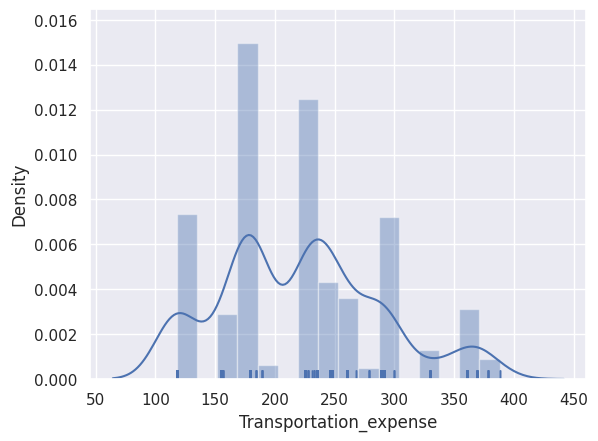

In [ ]:
# Distributions
p = sns.distplot(price['Transportation_expense'], kde=True, rug=True)

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 99% confidence interval di sekitar variabel "harga"

df = np.abs(price.Transportation_expense - price.Transportation_expense.mean())<=(2*price.Transportation_expense.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(740,)


0    True
1    True
2    True
3    True
4    True
Name: Transportation_expense, dtype: bool

In [ ]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
price2.head
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(690, 20) (740, 20)


<bound method NDFrame.head of      ID  Reason_for_absence  Month_of_absence  Seasons  \
0    11                  26                 7        1   
1    36                   0                 7        1   
2     3                  23                 7        1   
3     7                   7                 7        1   
4    11                  23                 7        1   
..   ..                 ...               ...      ...   
735  11                  14                 7        1   
736   1                  11                 7        1   
737   4                   0                 0        1   
738   8                   0                 0        2   
739  35                   0                 0        3   

     Transportation_expense  Distance_from_Residence_to_Work  Service_time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179            

<ipython-input-55-48f9dad38816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(price2['Transportation_expense'], kde=True, rug=True)


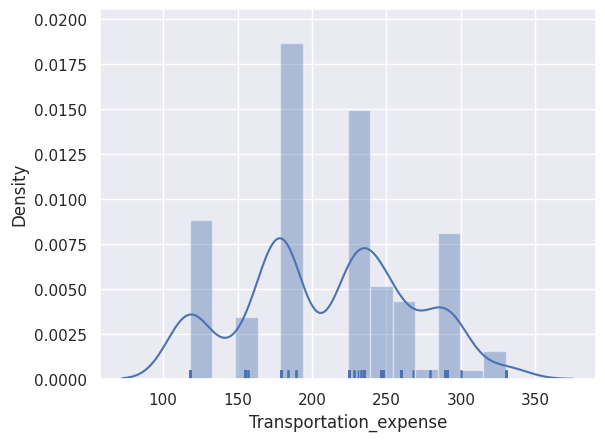

In [ ]:
# Distributions
p = sns.distplot(price2['Transportation_expense'], kde=True, rug=True)

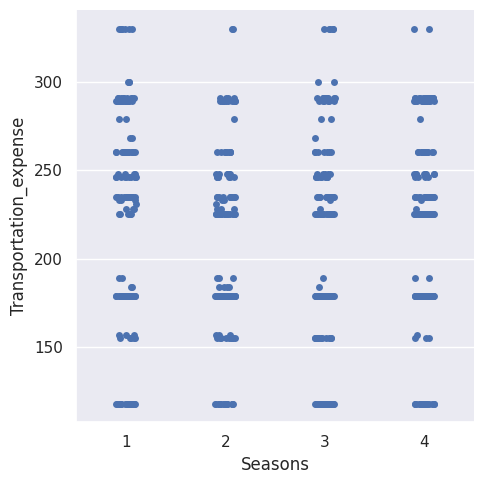

In [ ]:
# Plot lagi setelah outlier removal
p= sns.catplot(x="Seasons", y="Transportation_expense", data=price2)
# Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.6% of the points cannot be placed; y

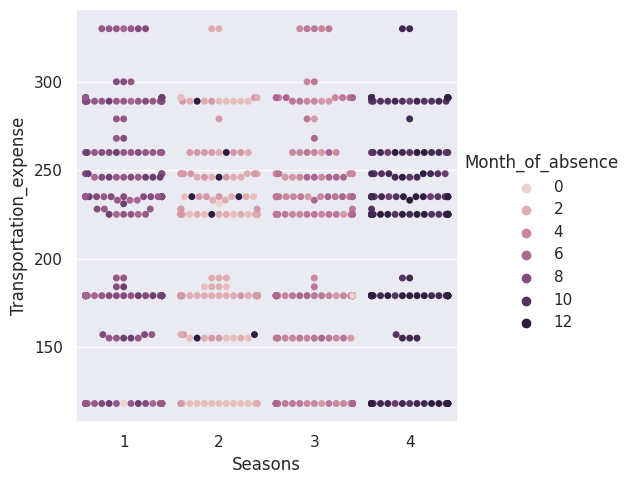

In [ ]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)

p= sns.catplot(x="Seasons", y="Transportation_expense", hue="Month_of_absence", kind="swarm", data=price2)

# **Missing Value**

In [ ]:
# General Look at the Missing Values
print(price2.isnull().sum())

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64


In [ ]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Service_time'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

<ipython-input-59-e87512befb51>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price2.dropna(inplace=True)


In [ ]:
print(price2.isnull().sum())

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64


In [ ]:
#mengecek apakah ada duplikat data?
print(price2.shape)
price2.duplicated().sum()

(690, 20)


90

In [ ]:
#menghapus entri yang memiliki data duplikat 
price2.drop_duplicates(inplace=True)
print(price2.duplicated().sum()) # no more duplicates
print(price2.shape) # re-check by printing data size

0
(600, 20)


<ipython-input-62-f16764d51e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price2.drop_duplicates(inplace=True)


# **(PairWise) Scatter Plot**

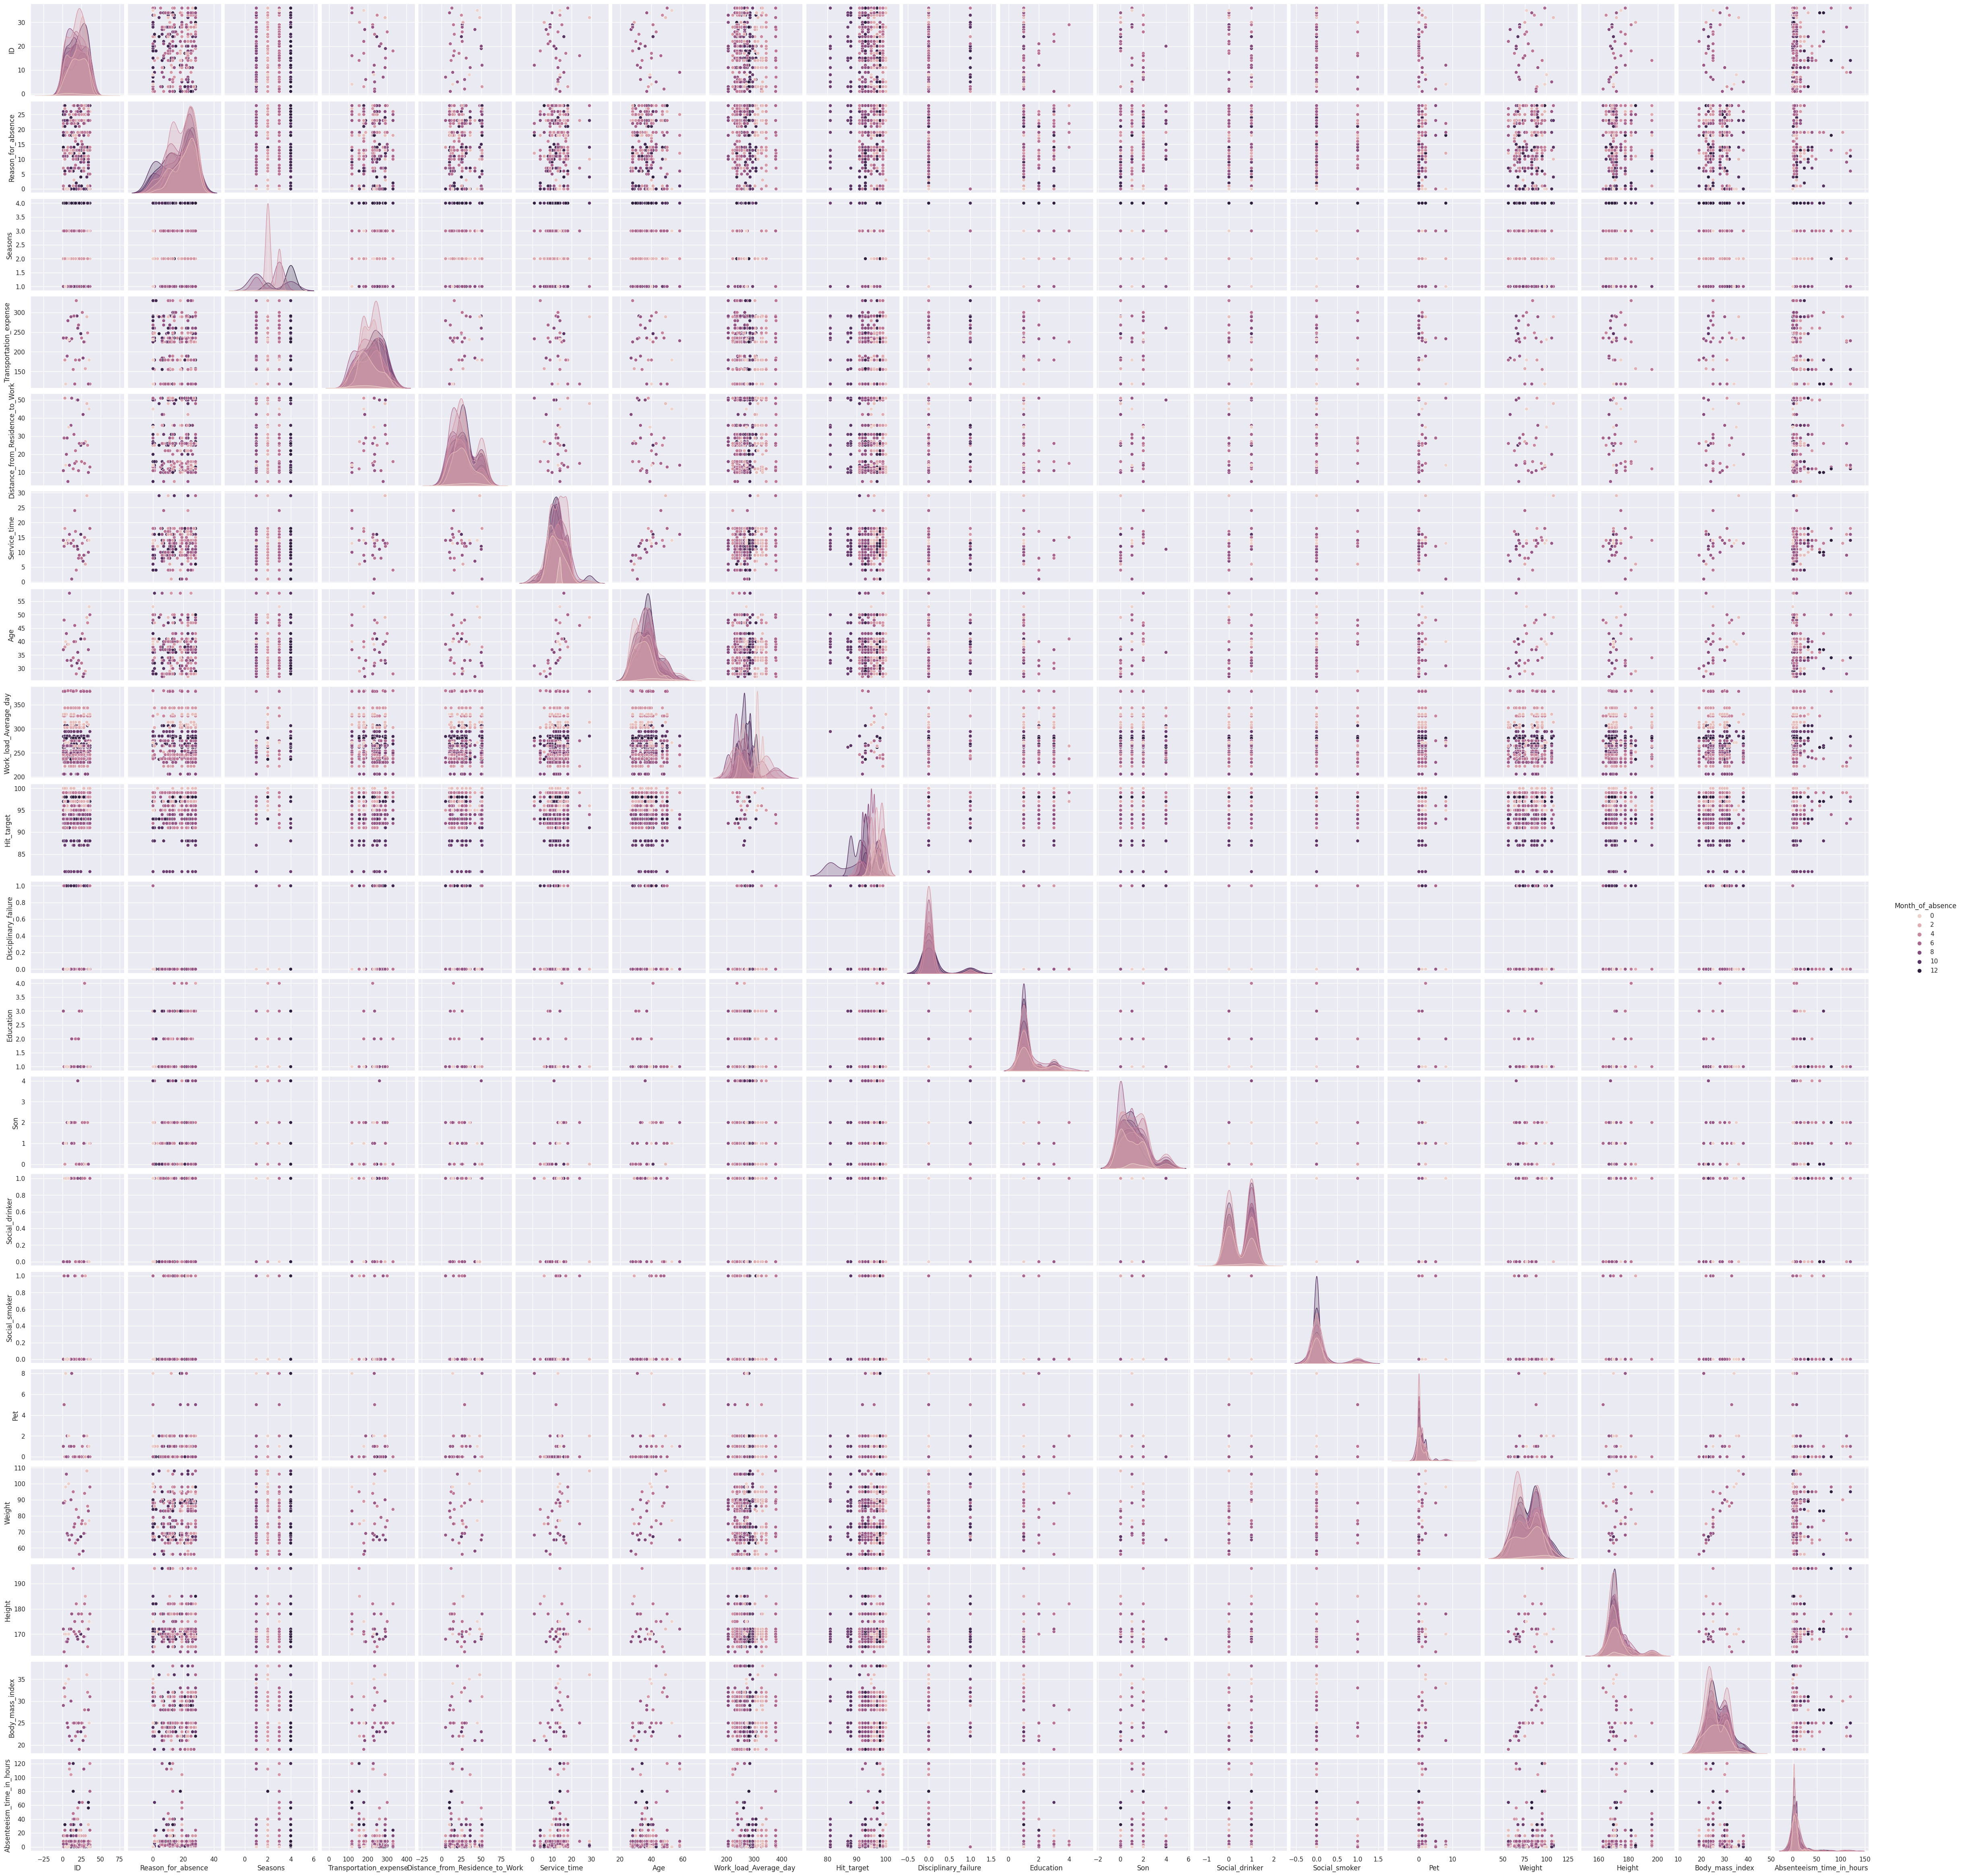

In [ ]:
# Scatter Plots; https://seaborn.pydata.org/generated/seaborn.pairplot.html
p = sns.pairplot(price2, hue="Month_of_absence")
# Warning agak lambat (variabel cukup banyak)

In [ ]:
# Coba kita perhatikan sebagiannya saja dulu dan coba kelompokkan berdasarkan "Parking"
p = sns.pairplot(price2[['Transportation_expense','Social_smoker','Month_of_absence','Reason_for_absence','Seasons']], hue="Seasons")
# Ada pola menarik?

# **Saving (preprocessed) Data**

In [ ]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("data_01_pricing_PreProcessed.csv", encoding='utf8')

# **Data Grouping**

In [ ]:
# Slicing DataFrame - Just like query in SQL
price2[price2["Son"] == "172"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

# **Boxplot**

In [ ]:
# BoxPlots
p = sns.boxplot(x="Transportation_expense", y="Seasons", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

In [ ]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="Transportation_expense", y="Seasons", data=price)

In [ ]:
p = sns.catplot(x="Seasons", y="Transportation_expense", hue="Month_of_absence", kind="box", data=price2)

**Checking Correlations**

In [ ]:
price2.corr()

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = price2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/Absenteeism_at_work.csv')
pd.plotting.parallel_coordinates(df_iris, 'Age', color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()